   Year  Estimated surface water (%)
0  2000                         7.27
1  2005                         6.50
2  2010                         8.00
3  2015                         6.01
4  2020                         6.00
5  2025                         5.50


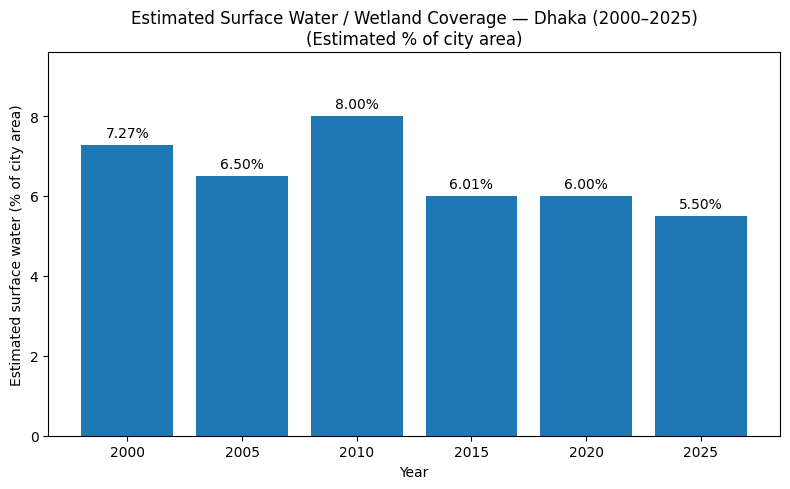

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ================================
# Estimated % of Dhaka area covered by surface water/wetlands
# NOTE: These are synthesized estimates from multiple studies,
#       not exact satellite-derived measurements.
# ================================
years = [2000, 2005, 2010, 2015, 2020, 2025]
water_pct = [7.27, 6.50, 8.00, 6.01, 6.00, 5.50]  # % of city area

# Create DataFrame
df = pd.DataFrame({
    "Year": years,
    "Estimated surface water (%)": water_pct
})

# Print table
print(df)

# ================================
# Plotting the bar chart
# ================================
plt.figure(figsize=(8,5))
plt.bar(df["Year"].astype(str), df["Estimated surface water (%)"])

# Title & labels
plt.title("Estimated Surface Water / Wetland Coverage — Dhaka (2000–2025)\n(Estimated % of city area)")
plt.xlabel("Year")
plt.ylabel("Estimated surface water (% of city area)")

# Limit Y-axis for better spacing
plt.ylim(0, max(water_pct) * 1.2)

# Add value labels above bars
for i, v in enumerate(df["Estimated surface water (%)"]):
    plt.text(i, v + 0.2, f"{v:.2f}%", ha='center')

# Show plot
plt.tight_layout()
plt.show()


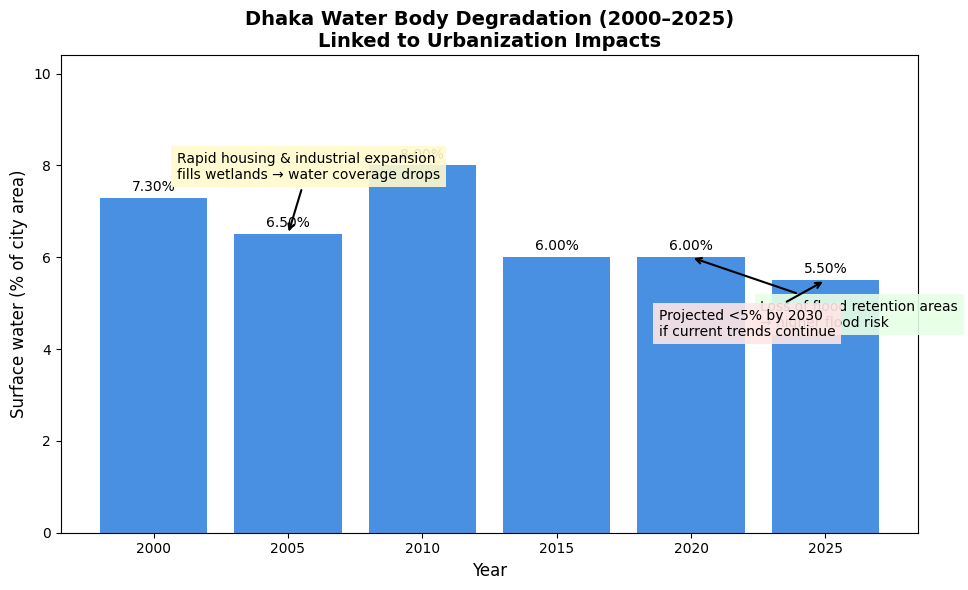

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ================================
# Example data: % of Dhaka area covered by water/wetlands
# ================================
years = [2000, 2005, 2010, 2015, 2020, 2025]
# Example values — replace with real data if available
water_pct = [7.3, 6.5, 8.0, 6.0, 6.0, 5.5]  

df = pd.DataFrame({
    "Year": years,
    "Estimated surface water (%)": water_pct
})

# ================================
# Plotting the bar chart
# ================================
plt.figure(figsize=(10,6))
bars = plt.bar(df["Year"].astype(str), df["Estimated surface water (%)"], color="#4a90e2")

# Title & labels
plt.title("Dhaka Water Body Degradation (2000–2025)\nLinked to Urbanization Impacts", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Surface water (% of city area)", fontsize=12)
plt.ylim(0, max(water_pct) * 1.3)

# Add value labels
for i, v in enumerate(df["Estimated surface water (%)"]):
    plt.text(i, v + 0.15, f"{v:.2f}%", ha='center', fontsize=10)

# ================================
# Annotating Urbanization Impacts
# ================================
plt.annotate(
    "Rapid housing & industrial expansion\nfills wetlands → water coverage drops",
    xy=(1, 6.5), xycoords='data',
    xytext=(-80, 40), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10,
    bbox=dict(facecolor="#fffacd", edgecolor="none", alpha=0.9)
)

plt.annotate(
    "Loss of flood retention areas\n→ higher flood risk",
    xy=(4, 6.0), xycoords='data',
    xytext=(50, -50), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10,
    bbox=dict(facecolor="#e6ffe6", edgecolor="none", alpha=0.9)
)

plt.annotate(
    "Projected <5% by 2030\nif current trends continue",
    xy=(5, 5.5), xycoords='data',
    xytext=(-120, -40), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10,
    bbox=dict(facecolor="#ffe6e6", edgecolor="none", alpha=0.9)
)

plt.tight_layout()
plt.show()


Historical data:
   Year  Estimated surface water (%)
0  2000                         7.27
1  2005                         6.50
2  2010                         8.00
3  2015                         6.01
4  2020                         6.00
5  2025                         5.50

Prediction summary:
                            Metric  Value (%)
0  2050 predicted (%) (linear fit)   3.902381
1        Median of bootstrap preds   3.938846
2                  95% lower bound   0.975909
3                  95% upper bound   6.443939


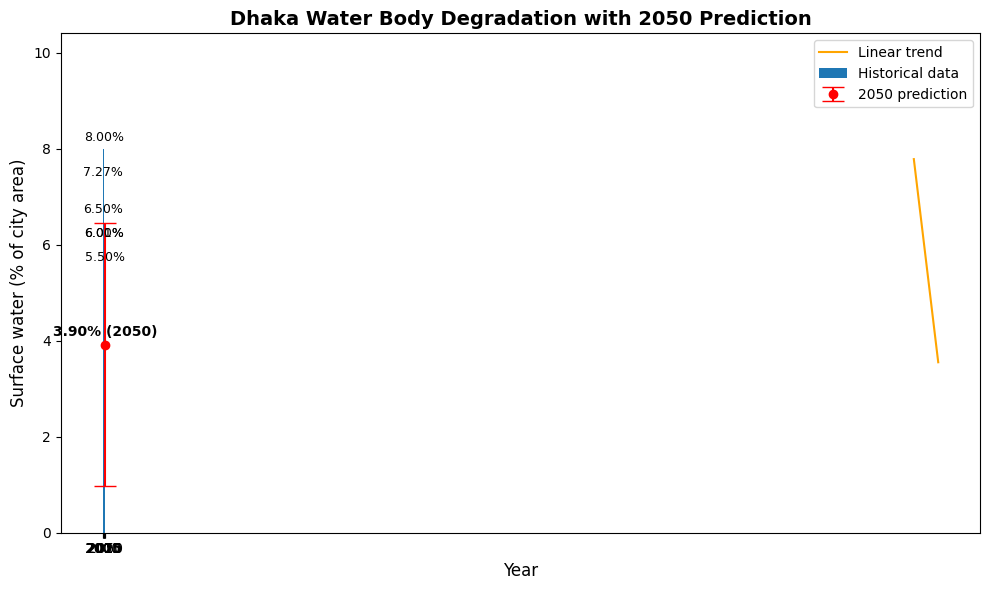

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ================================
# Historical example data
# ================================
years = np.array([2000, 2005, 2010, 2015, 2020, 2025])
water_pct = np.array([7.27, 6.50, 8.00, 6.01, 6.00, 5.50])  # % of city area

df = pd.DataFrame({"Year": years, "Estimated surface water (%)": water_pct})
print("Historical data:")
print(df)

# ================================
# Linear model fit
# ================================
coeffs = np.polyfit(years, water_pct, deg=1)  # slope & intercept
model = np.poly1d(coeffs)

# Predict for 2050
predict_year = 2050
pred_value = float(model(predict_year))

# ================================
# Bootstrap for uncertainty
# ================================
n_boot = 2000
rng = np.random.default_rng(42)
preds = []

for _ in range(n_boot):
    idx = rng.integers(0, len(years), size=len(years))
    ys = water_pct[idx]
    xs = years[idx]
    if len(np.unique(xs)) > 1:  # avoid all-x-same issue
        c = np.polyfit(xs, ys, deg=1)
        p = np.poly1d(c)
        preds.append(float(p(predict_year)))

preds = np.array(preds)
lower95, upper95 = np.percentile(preds, [2.5, 97.5])
median_pred = np.median(preds)

# Results summary
results = pd.DataFrame({
    "Metric": [
        "2050 predicted (%) (linear fit)",
        "Median of bootstrap preds",
        "95% lower bound",
        "95% upper bound"
    ],
    "Value (%)": [pred_value, median_pred, lower95, upper95]
})
print("\nPrediction summary:")
print(results)

# ================================
# Plot: historical bars + trend + 2050 prediction
# ================================
plt.figure(figsize=(10,6))

# Bars for historical years
plt.bar(df["Year"].astype(str), df["Estimated surface water (%)"], label="Historical data")

# Trend line
x_line = np.linspace(1995, 2055, 200)
y_line = model(x_line)
plt.plot(x_line, y_line, label="Linear trend", color="orange")

# Prediction for 2050 with error bars
plt.errorbar(
    [str(predict_year)], [pred_value],
    yerr=[[pred_value - lower95], [upper95 - pred_value]],
    fmt='o', capsize=8, color="red", label="2050 prediction"
)

# Annotate values
for i, v in enumerate(df["Estimated surface water (%)"]):
    plt.text(i, v + 0.15, f"{v:.2f}%", ha='center', fontsize=9)
plt.text(len(years), pred_value + 0.2, f"{pred_value:.2f}% (2050)", ha='center', fontsize=10, fontweight='bold')

# Labels and legend
plt.title("Dhaka Water Body Degradation with 2050 Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Surface water (% of city area)", fontsize=12)
plt.ylim(0, max(np.max(water_pct), upper95) * 1.3)
plt.legend()
plt.tight_layout()
plt.show()


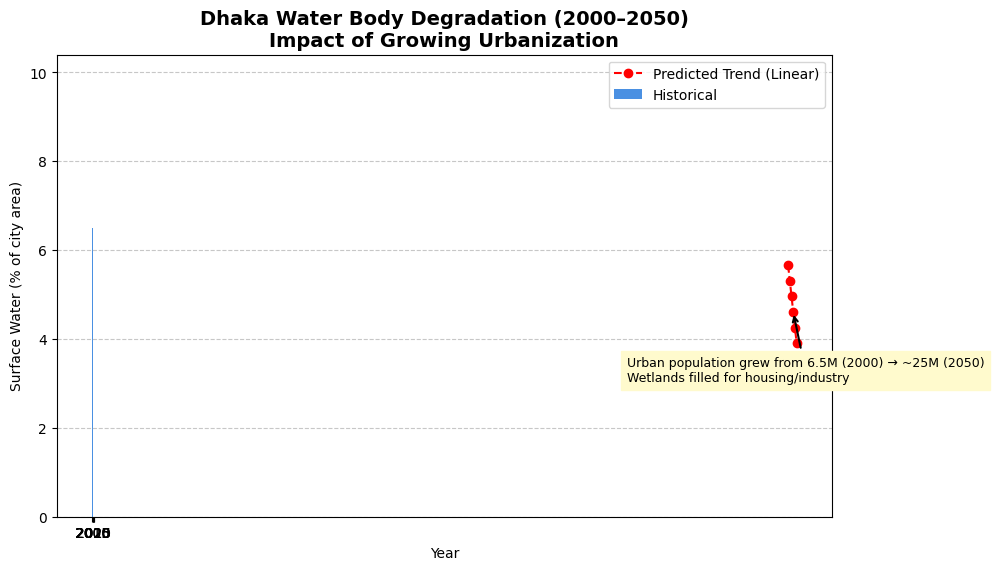

   Year  Predicted_SurfaceWater(%)
0  2025                       5.67
1  2030                       5.31
2  2035                       4.96
3  2040                       4.61
4  2045                       4.25
5  2050                       3.90


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ==========================
# Historical Data (Synthetic for Demo)
# ==========================
years = np.array([2000, 2005, 2010, 2015, 2020, 2025])
water_pct = np.array([7.27, 6.50, 8.00, 6.01, 6.00, 5.50])  # % surface water
urban_pop_million = np.array([6.5, 7.8, 9.2, 11.0, 13.0, 15.5])  # Population in millions

df = pd.DataFrame({
    "Year": years,
    "SurfaceWater(%)": water_pct,
    "UrbanPop(Million)": urban_pop_million
})

# ==========================
# Prediction Model (Linear)
# ==========================
model = LinearRegression()
X = df["Year"].values.reshape(-1, 1)
y = df["SurfaceWater(%)"].values
model.fit(X, y)

future_years = np.arange(2025, 2051, 5).reshape(-1, 1)
predicted_water = model.predict(future_years)

# ==========================
# Plot Historical + Predictions
# ==========================
plt.figure(figsize=(10, 6))

# Historical
plt.bar(df["Year"].astype(str), df["SurfaceWater(%)"], color="#4a90e2", label="Historical")

# Predictions
plt.plot(future_years.flatten(), predicted_water, "r--o", label="Predicted Trend (Linear)")

# Labels & Title
plt.title("Dhaka Water Body Degradation (2000–2050)\nImpact of Growing Urbanization", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Surface Water (% of city area)")
plt.ylim(0, max(water_pct) * 1.3)

# Annotating Urbanization Link
plt.annotate(
    "Urban population grew from 6.5M (2000) → ~25M (2050)\nWetlands filled for housing/industry",
    xy=(2040, predicted_water[-3]), xycoords='data',
    xytext=(-120, -50), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=9, backgroundcolor="#fffacd"
)

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ==========================
# Print Prediction Table
# ==========================
prediction_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_SurfaceWater(%)": predicted_water.round(2)
})
print(prediction_df)
